<a href="https://colab.research.google.com/github/UICHANLEE/2023_DataScience/blob/ML/4%EC%9E%A5_%EB%B6%84%EB%A5%98_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 앙상블 학습
- 비정형 데이터의 분류는 딥러닝 모델이 뛰어난 성적을 얻고 있지만, 정형 데이터는 앙상블 모델이 뛰어난 성능
  1. Voting
  2. Bagging - Random Forest
  3. Boosting - AdaBoost, Gradient Boost, XGBoost(eXtra Gradient Boost),    LightGBM(Light Gradient Boost)   
  => Gradient Boost (경사하강법)

### Voting
- 같은 데이터 셋을 서로 다른 모델을 예측해서 가장 좋은 조건의 모델 선택
- Hard voting : 다수결로 최종 결정
- Soft voting : 클래스의 평균으로 결정

### Bagging
- 서로 다른 데이터 셋으로 같은 모델을 이용하여 최종 예측 선택

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# 개별모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression(max_iter = 3000)
knn_clf = KNeighborsClassifier(n_neighbors = 8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators = [('LR', lr_clf), ('KNN', knn_clf)],
                          voting = 'soft') # 홀수개가 있으면 좋음

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)                        

In [ ]:
# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

Voting 분류기 정확도: 0.9474


In [ ]:
# 개별 모델의 학습/예측/평가.
for classifier in [lr_clf, knn_clf]:
  classifier.fit(X_train, y_train)
  pred = classifier.predict(X_test)
  class_name = classifier.__class__.__name__
  print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

LogisticRegression 정확도: 0.9649
KNeighborsClassifier 정확도: 0.9386


# 4 Random Forest
- Bagging의 대표적인 알고리즘

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)   

rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

랜덤 포레스트 정확도: 0.9561


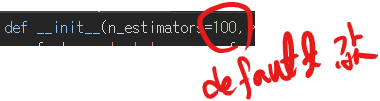

- n_estimators : 랜덤 포레스트에서 트리의 수를 지어
- max_features : 최적의 분할을 위해 고려할 최대 피처 갯수
- max_depth이나 min_samples_leaf와 같이 결정 트리에서 과적합을 개선하기 위해 사용되는 파라미터가 랜덤 포레스트에 똑같이 적용

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [8, 16, 24],
    'min_samples_leaf' : [1, 6, 12],
    'min_samples_split' : [2, 8, 16]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV수행
rf_clf = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
최고예측 정확도: 0.9627


예측 정확도 : 0.9474


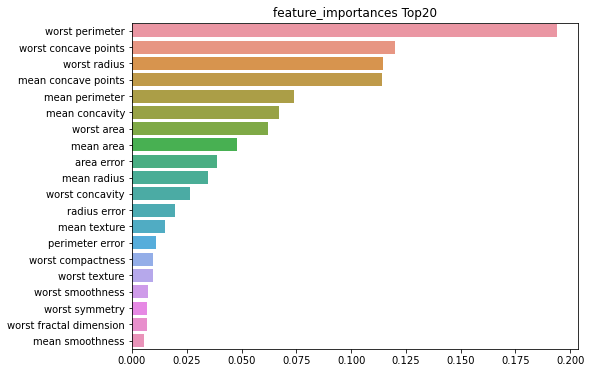

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

rf_clf1 = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 6, max_depth = 16, 
                                 min_samples_split = 2, random_state = 0)

rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = cancer.feature_names)
ftr_top20 = ftr_importances.sort_values(ascending= False)[:20]

plt.figure(figsize = (8, 6))
plt.title('feature_importances Top20')
sns.barplot(x = ftr_top20, y = ftr_top20.index)
plt.show()


# 5 GBM(Gradient Boosting Machine)

- AdaBoost와 유사하나 가중치를 업데이트를 경사하강법을 이용하는 것이 큰 차이

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import pandas as pd

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                    cancer.target,
                                                    test_size = 0.2, 
                                                    random_state = 156)

# GBM 수행시간 측정을 위함. 시작 시간 설정

start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state = 0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))
print("GBM 수행시간: {0:.4f} 초".format(time.time() - start_time))

GBM 정확도 : 0.9561
GBM 수행시간: 0.4317 초


# GBM 하이퍼 파라미터 소개

### 모델 파라미터

- loss : 경사하강법에서 사용할 비용함수 지정 (default = deviance)
- learning_rate = 0~1 값 지정가능   
  너무 작은값 => 수행시간이 오래걸림   
  너무 큰 값 => 최소 오류값 찾기 힘듦
- n_estimators : 약한 학습기의 개수
- subsample : 학습에 사용하는 데이터의 샘플링 비율

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 500],
    'learning_rate' : [0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid= params, cv = 2, verbose = 1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.1, 'n_estimators': 500}
최고 예측 정확도 : 0.9517


# XGBoost
- 파이썬 래퍼 XGBoost
- **사이킷런 래퍼 XGBoost**

In [ ]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=400, eval_set = evals, 
                eval_metric = 'logloss', verbose = True)
w_preds = xgb_wrapper.predict(X_test)
w_preds_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 400 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler # 스케일링
from sklearn.linear_model import LogisticRegression

def get_clf_eval(y_test, pred, pred_proba = None):
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # ROC_AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)
  print('오차행렬')
  print(confusion)
  print('정확도;{0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, w_preds, w_preds_proba)

오차행렬
[[35  2]
 [ 1 76]]
정확도;0.9737, 정밀도 : 0.9744, 재현율 : 0.9870, F1 : 0.9806, AUC:0.9954


In [69]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_set = evals, 
                eval_metric = 'logloss', verbose = True)
ws100_preds = xgb_wrapper.predict(X_test)
w_preds_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

In [70]:
get_clf_eval(y_test, ws100_preds, w_preds_proba)

오차행렬
[[34  3]
 [ 1 76]]
정확도;0.9649, 정밀도 : 0.9620, 재현율 : 0.9870, F1 : 0.9744, AUC:0.9954


# 7 LightGBM


In [71]:
from lightgbm import LGBMClassifier

import matplotlib.pyplot as plt
dataset = load_breast_cancer()
cancer_df = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
cancer_df['target'] = dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size = 0.2, random_state = 156)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 156)
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate =0.05)
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric = 'logloss', eval_set = evals, verbose = True)
preds = lgbm_wrapper.predict(X_features)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]


[1]	training's binary_logloss: 0.625671	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248	valid_1's binary_logloss: 0.628248
Training until validation scores don't improve for 50 rounds.
[2]	training's binary_logloss: 0.588173	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	training's binary_loglos

ValueError: ignored